# Installing XGBoost

In [ ]:
pip install -- upgrade xgboost


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


# Importing libaries and datasets

In [ ]:
# Importing Seaborn for data visualization
import seaborn as sns

# Importing Pandas for data manipulation
import pandas as pd

# Importing NumPy for numerical computations
import numpy as np

# Importing Matplotlib for plotting
import matplotlib.pyplot as plt

# Importing train_test_split from scikit-learn for splitting data
from sklearn.model_selection import train_test_split

# Importing XGBoost for gradient boosting
import xgboost as xgb

# Importing ensemble module from scikit-learn for ensemble methods
from sklearn import ensemble

# Importing OneHotEncoder for categorical feature encoding
from sklearn.preprocessing import OneHotEncoder

# Importing LabelEncoder for label encoding
from sklearn.preprocessing import LabelEncoder

# Importing mean_squared_error for evaluating model performance
from sklearn.metrics import mean_squared_error

# Import warnings module and a filter to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read 'school-shootings-data.csv'
shootings = pd.read_csv('/content/drive/MyDrive/ML AI 2023/Wortham/John/winter/school-shootings-data.csv')

# Goal

The goal of this project is to build a model that predicts the casualties of a shooting. This will allow me to come to a new or redefined conclusion.

# Examining the data

In [ ]:
# Displaying first five rows of the dataset
shootings.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0


In [ ]:
# Getting the dimensions of the dataset
shootings.shape

(387, 50)

In [ ]:
# Getting the columns of the dataset
shootings.columns

Index(['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week',
       'city', 'state', 'school_type', 'enrollment', 'killed', 'injured',
       'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1',
       'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1',
       'deceased_notes1', 'age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'white', 'black', 'hispanic', 'asian',
       'american_indian_alaska_native', 'hawaiian_native_pacific_islander',
       'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat',
       'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county',
       'state_fips', 'county_fips', 'ulocale'],
      dtype='object')

In [ ]:
# Finding the data type for each column
shootings.dtypes

uid                                   int64
nces_school_id                       object
school_name                          object
nces_district_id                    float64
district_name                        object
date                                 object
school_year                          object
year                                  int64
time                                 object
day_of_week                          object
city                                 object
state                                object
school_type                          object
enrollment                           object
killed                                int64
injured                               int64
casualties                            int64
shooting_type                        object
age_shooter1                        float64
gender_shooter1                      object
race_ethnicity_shooter1              object
shooter_relationship1                object
shooter_deceased1               

In [ ]:
# Counting the number of unique values in a column
num_unique_values = shootings['weapon'].nunique()

# Printing the result
print("Number of unique values in the column:", num_unique_values)

Number of unique values in the column: 143


# **XGBoost**

XGBoost (eXtreme Gradient Boosting) is a popular and powerful machine learning algorithm known for its efficiency and effectiveness in supervised learning tasks, particularly for regression and classification problems. It belongs to the ensemble learning methods and is based on gradient boosting framework.

# Preprocessing the data

# Cleaning the data

In [ ]:
# Dropping all unnecessary columns
columns_to_drop = ['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'city', 'killed', 'injured','age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'two_or_more', 'lat', 'lunch',
       'long', 'county', 'county_fips', 'ulocale','weapon_source','deceased_notes1','state','weapon']
shootings.drop(columns_to_drop, axis=1, inplace=True)

# Transforming the data

The two types of features that I needed to transform and couldn’t afford to drop  were time and amount of students per different races enrolled in school.  I needed to transform the race enrollment values because I realized that ratioing these values to the respective enrollment would give me better data. I achieved this by simply dividing. I needed to transform time because my model was counting each separate time as individual categorical values, which created too many. To solve this, I grouped the times by hour.

In [ ]:
# Changing the enrollment and hispanic column to float datatype by getting rid of the comma
shootings['enrollment'] = shootings['enrollment'].str.replace(',', '').astype(float)
shootings['hispanic'] = shootings['hispanic'].str.replace(',', '').astype(float)

In [ ]:
# Getting the students per enrollment for all of the races or ethnic groups

shootings['white_average'] = shootings['white'] / shootings['enrollment']
shootings['black_average'] = shootings['black'] / shootings['enrollment']
shootings['hispanic_average'] = shootings['hispanic'] / shootings['enrollment']
shootings['asian_average'] = shootings['asian'] / shootings['enrollment']
shootings['american_indian_alaska_native_average'] = shootings['american_indian_alaska_native'] / shootings['enrollment']
shootings['hawaiian_native_pacific_islander_average'] = shootings['hawaiian_native_pacific_islander'] / shootings['enrollment']

In [ ]:
# Dropping the origional race columns after we created the new race columns

race_drop = ['white','black','hispanic','asian','american_indian_alaska_native', 'hawaiian_native_pacific_islander']
shootings.drop(race_drop, axis=1, inplace=True)

In [ ]:
# Grouping all times together by hour and am,pm

shootings['time'] = shootings['time'].str.replace(r':...', ':', regex=True)
shootings.head()

,year,time,day_of_week,school_type,enrollment,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,...,staffing,low_grade,high_grade,state_fips,white_average,black_average,hispanic_average,asian_average,american_indian_alaska_native_average,hawaiian_native_pacific_islander_average
0,1999,11:AM,Tuesday,public,1965.0,34,indiscriminate,18.0,m,w,...,89.6,9,12,8,0.907379,0.008142,0.056997,0.021374,0.006107,NaN
1,1999,12:PM,Thursday,public,588.0,1,targeted,14.0,m,NaN,...,39.0,6,8,22,0.008503,0.991497,0.000000,0.000000,0.000000,NaN
2,1999,8:AM,Thursday,public,1369.0,6,indiscriminate,15.0,m,w,...,84.0,9,12,13,0.868517,0.099343,0.020453,0.010957,0.000730,NaN
3,1999,10:AM,Monday,public,3147.0,1,targeted,17.0,m,NaN,...,41.0,9,12,42,0.066412,0.869399,0.008580,0.054020,0.001589,NaN
4,1999,7:AM,Wednesday,public,1116.0,1,targeted,NaN,m,NaN,...,NaN,9,12,25,0.035842,0.676523,0.257168,0.025986,0.004480,NaN


In [ ]:
# Checking to see if the time values are correct
unique_values = shootings['time'].unique()
print(unique_values)

['11:AM' '12:PM' '8:AM' '10:AM' '7:AM' '3:PM' nan '9:AM' '1:PM' '2:PM'
 '4:PM' '11:PM' '6:AM']


In [ ]:
# Defining the target and features that will be used
X,y = shootings.drop('casualties', axis = 1), shootings[['casualties']]
# Extracting text features
cats = X.select_dtypes(exclude = np.number).columns.tolist()

# Converting them to pandas category
for col in cats:
  X[col] = X[col].astype('category')

# Preparing the data

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [ ]:
# Creating regression matricies

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical = True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical = True)

# Analyze the data

In [ ]:
# Defining the parameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

# Building the base model
# Training an XGBoost model with specified parameters
model = xgb.train(
    params=params,           # Parameters for training the model
    dtrain=dtrain_reg,       # Training data in DMatrix format
    num_boost_round=100,     # Number of boosting rounds (iterations)
)

# Predicting the target variable using the trained model on the test data
preds = model.predict(dtest_reg)

# Calculating the Root Mean Squared Error (RMSE) between the actual target values (y_test) and the predicted values (preds)
# squared=False ensures that RMSE is calculated as the square root of the mean squared error, giving the RMSE in the same units as the target variable
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"The RMSE of the base model: {rmse:.3f}")

The RMSE of the base model: 2.571


In [ ]:
# Parameters for XGBoost training
params = {"objective": "reg:squarederror",   # Objective function for regression task
          "tree_method": "gpu_hist"}         # Method for tree construction using GPU acceleration

# Evaluation data to monitor performance during training
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]  # List of tuples containing DMatrix and label for training and validation data

In [ ]:
# Number of boosting rounds
n = 1000

# Evaluation data to monitor performance during training
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]  # List of tuples containing DMatrix and label for training and validation data

# Training an XGBoost model with specified parameters and evaluating performance
casualties_model = xgb.train(
    params=params,              # Parameters for training the model
    dtrain=dtrain_reg,          # Training data in DMatrix format
    num_boost_round=n,          # Number of boosting rounds (iterations)
    evals=evals,                # Evaluation sets to monitor performance
    verbose_eval=25             # Frequency of printing evaluation results
)

[0]	train-rmse:3.43601	validation-rmse:2.02717
[25]	train-rmse:0.13520	validation-rmse:2.57828
[50]	train-rmse:0.01283	validation-rmse:2.57157
[75]	train-rmse:0.00132	validation-rmse:2.57101
[100]	train-rmse:0.00093	validation-rmse:2.57099
[125]	train-rmse:0.00093	validation-rmse:2.57099
[150]	train-rmse:0.00093	validation-rmse:2.57099
[175]	train-rmse:0.00093	validation-rmse:2.57099
[200]	train-rmse:0.00093	validation-rmse:2.57099
[225]	train-rmse:0.00093	validation-rmse:2.57099
[250]	train-rmse:0.00093	validation-rmse:2.57099
[275]	train-rmse:0.00093	validation-rmse:2.57099
[300]	train-rmse:0.00093	validation-rmse:2.57099
[325]	train-rmse:0.00093	validation-rmse:2.57099
[350]	train-rmse:0.00093	validation-rmse:2.57099
[375]	train-rmse:0.00093	validation-rmse:2.57099
[400]	train-rmse:0.00093	validation-rmse:2.57099
[425]	train-rmse:0.00093	validation-rmse:2.57099
[450]	train-rmse:0.00093	validation-rmse:2.57099
[475]	train-rmse:0.00093	validation-rmse:2.57099
[500]	train-rmse:0.00093	

As seen above, the model is most accurate towards the start.

In [ ]:
# Number of boosting rounds
n = 10000

# Training an XGBoost model with specified parameters, evaluating performance, and implementing early stopping
casualties_model = xgb.train(
    params=params,                          # Parameters for training the model
    dtrain=dtrain_reg,                      # Training data in DMatrix format
    num_boost_round=n,                      # Maximum number of boosting rounds (iterations)
    evals=evals,                            # Evaluation sets to monitor performance
    verbose_eval=1,                         # Frequency of printing evaluation results
    early_stopping_rounds= 1                 # Number of rounds with no improvement after which training will be stopped
)

[0]	train-rmse:3.43601	validation-rmse:2.02717


After testing different early stopping rounds, 1 gives the best model.

In [ ]:
results = xgb.cv(
    params, dtrain_reg,
    num_boost_round = n,
    nfold = 5,
    early_stopping_rounds = 20
)

In [ ]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.366259,0.228203,3.986569,1.241893


In [ ]:
# Displaying the best cv test rmse
best_rmse = results['test-rmse-mean'].min()
best_rmse

3.9865685964212325

Since my CV RMSE isn't extremely close to my single model RMSE, this suggests that my model may be overfitting a bit.

But overall, since my single model rmse isn't super far from my CV RMSE, the model is likely going to generalize well to unseen data. When the CV RMSE and normal RMSE are similar, it suggests that the model's performance on the validation sets used in cross-validation is consistent with its performance on the test set (or unseen data) when trained on the entire dataset. This is a positive outcome, as it suggests that the model is not overfitting to the training data.

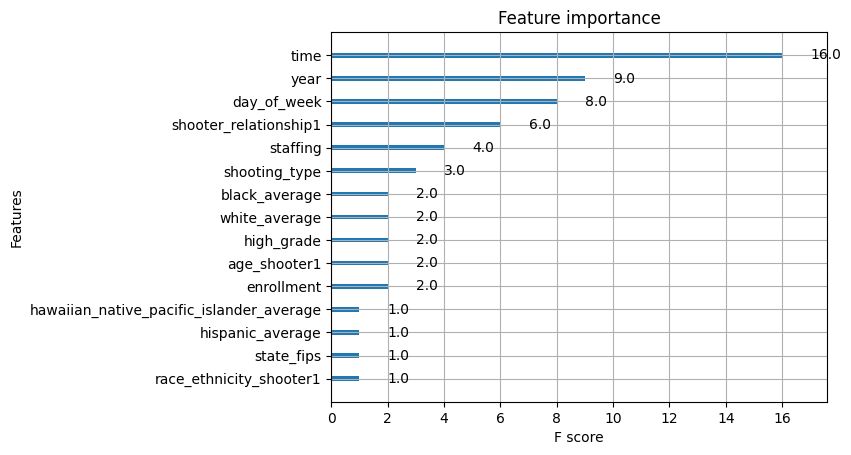

In [ ]:
# Ploting feature importance
xgb.plot_importance(casualties_model)
plt.show()

As seen above, time,year, the day of week, and shooter relationship were the four most significant features.

# Futher analysis: visualizations

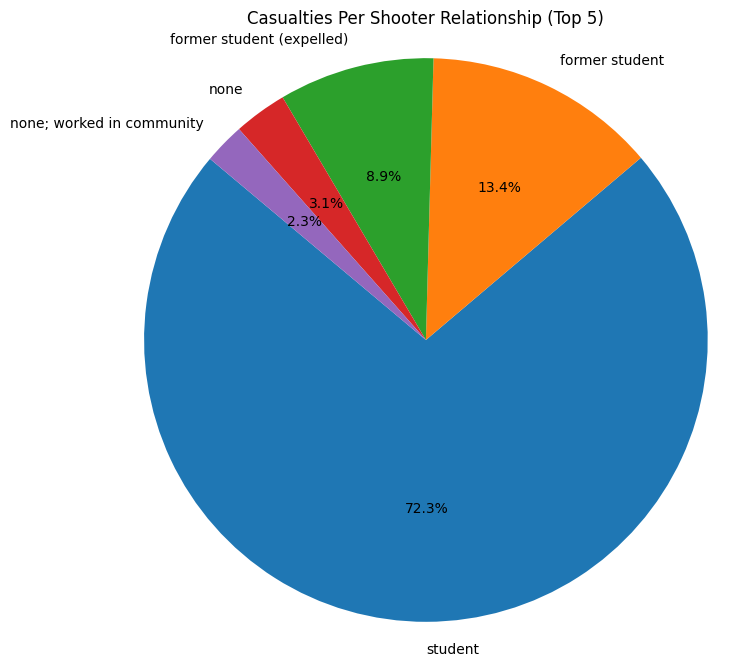

In [ ]:
# Grouping the data by shooting type and summing the casualties
casualties_per_type = shootings.groupby('shooter_relationship1')['casualties'].sum()

# Sorting the grouped data by casualties in descending order and selecting the top 5
top_5_types = casualties_per_type.sort_values(ascending=False).head(5)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_types, labels=top_5_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Casualties Per Shooter Relationship (Top 5)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

As seen above, students cause the most casualties.

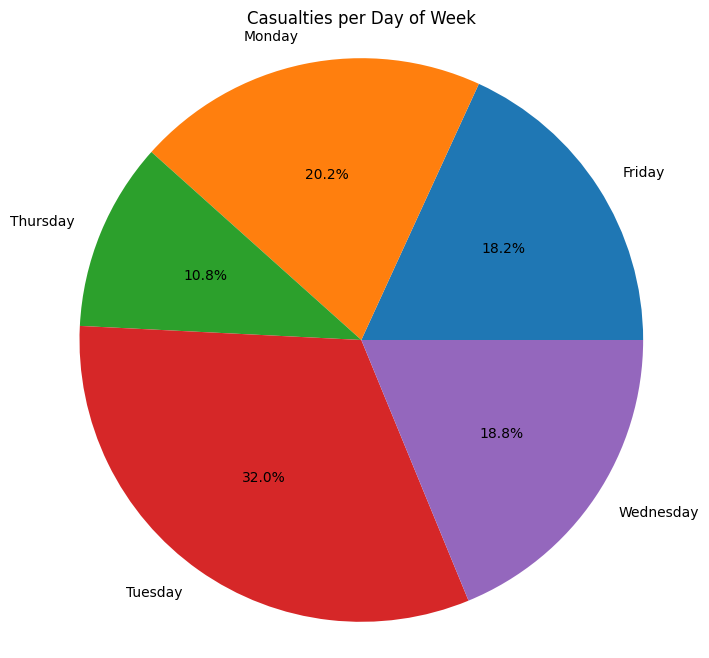

In [ ]:
# Grouping the data by day of the week and summing the casualties
casualties_per_day = shootings.groupby('day_of_week')['casualties'].sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.tab10.colors  # Using colors from the 'tab10' colormap
casualties_per_day.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Casualties per Day of Week')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

As seen above, Tuesday has a disproportionatly large ammount of casualties.

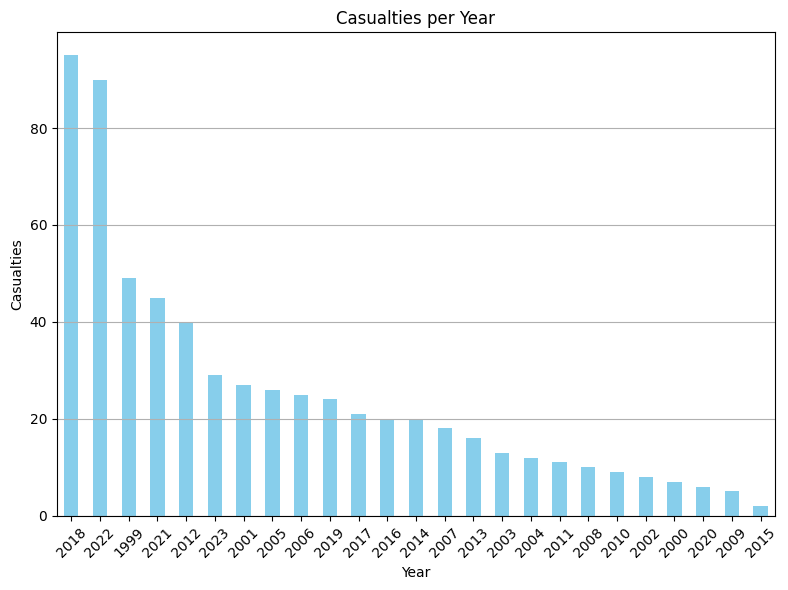

In [ ]:
# Grouping the shooting data by year and summing the casualties for each year
grouped_data = shootings.groupby('year')['casualties'].sum()

# Sorting the grouped data by total casualties in descending order
sorted_categories = grouped_data.sort_values(ascending=False)

# Creating a bar graph to visualize casualties per year
plt.figure(figsize=(8, 6))  # Setting the figure size
sorted_categories.plot(kind='bar', color='skyblue')  # Plotting a bar graph with sorted data, specifying color
plt.title('Casualties per Year')  # Setting the title of the plot
plt.ylabel('Casualties')  # Labeling the y-axis
plt.xlabel('Year')  # Labeling the x-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y')  # Adding grid lines only to the y-axis
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()  # Displaying the plot

As seen above, 2018 and 2022 had an unusually high ammount of casualties.

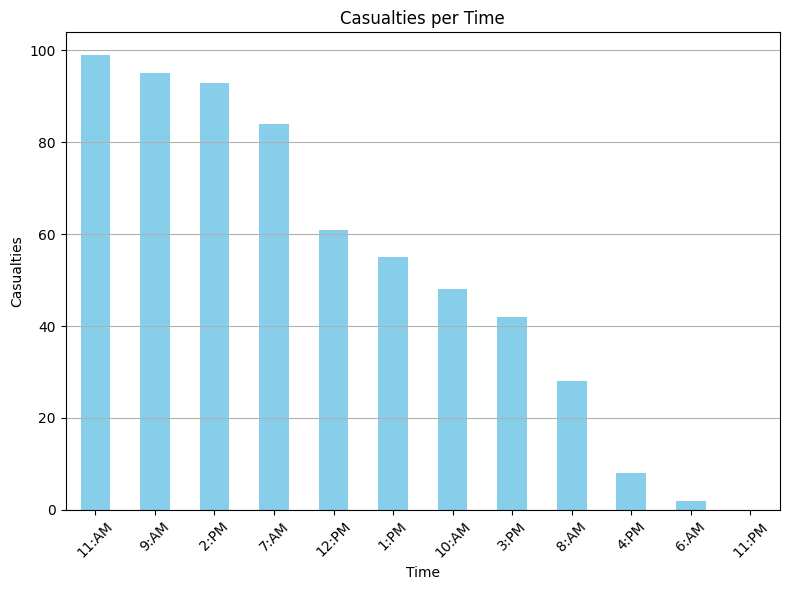

In [ ]:
# Grouping the shooting data by time and summing the casualties for each time
grouped_data = shootings.groupby('time')['casualties'].sum()

# Sorting the grouped data by total casualties in descending order
sorted_categories = grouped_data.sort_values(ascending=False)

# Creating a bar graph to visualize casualties per time
plt.figure(figsize=(8, 6))  # Setting the figure size
sorted_categories.plot(kind='bar', color='skyblue')  # Plotting a bar graph with sorted data, specifying color
plt.title('Casualties per Time')  # Setting the title of the plot
plt.ylabel('Casualties')  # Labeling the y-axis
plt.xlabel('Time')  # Labeling the x-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y')  # Adding grid lines only to the y-axis
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()  # Displaying the plot

As seen above, the majority of casualties occur in the morning or around lunch time.

# Gradient boost:

Gradient Boosting is a powerful ensemble learning technique used for both regression and classification tasks. It works by building a series of decision trees sequentially, with each tree correcting errors made by the previous one.

In [ ]:
# Define hyperparameters for Gradient Boosting Regressor
params = {
    "n_estimators": 500,             # Number of boosting stages (trees) to be used
    "max_depth": 4,                  # Maximum depth of the individual trees
    "min_samples_split": 5,          # Minimum number of samples required to split an internal node
    "learning_rate": 0.01,           # Learning rate (shrinkage) to reduce the contribution of each tree
    "loss": "squared_error",         # Loss function to be optimized
}

In [ ]:
# Selecting columns with categorical data
categorical_cols = shootings.select_dtypes(include=['object']).columns

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns using LabelEncoder
for column in categorical_cols:
    shootings[column] = label_encoder.fit_transform(shootings[column])


In [ ]:
# Checking the datatypes of the columns to see if the encoding worked
shootings.dtypes

year                                          int64
time                                          int64
day_of_week                                   int64
school_type                                   int64
enrollment                                  float64
casualties                                    int64
shooting_type                                 int64
age_shooter1                                float64
gender_shooter1                               int64
race_ethnicity_shooter1                       int64
shooter_relationship1                         int64
shooter_deceased1                           float64
resource_officer                              int64
staffing                                    float64
low_grade                                     int64
high_grade                                    int64
state_fips                                    int64
white_average                               float64
black_average                               float64
hispanic_ave

In [ ]:
# Checking for missing values in the shootings DataFrame
missing_values = shootings.isnull().sum()

# Filtering columns with missing values
columns_with_missing_data = missing_values[missing_values > 0]

# Getting the count of columns with missing data
num_columns_with_missing_data = len(columns_with_missing_data)

# Printing the result
print("Number of columns with missing data:", num_columns_with_missing_data)
print("\nColumns with missing data:")
print(columns_with_missing_data)

Number of columns with missing data: 9

Columns with missing data:
age_shooter1                                113
shooter_deceased1                           125
staffing                                     24
white_average                                10
black_average                                10
hispanic_average                             10
asian_average                                10
american_indian_alaska_native_average        11
hawaiian_native_pacific_islander_average    125
dtype: int64


In [ ]:
# Filling missing values with the mean for specific columns using inplace=True to modify the DataFrame in-place
# Had to manually fill the values in because of an unknown error when attempting to fill the whole data set at once
shootings['staffing'].fillna(shootings['staffing'].mean(), inplace=True)
shootings['enrollment'].fillna(shootings['enrollment'].mean(), inplace=True)
shootings['age_shooter1'].fillna(shootings['age_shooter1'].mean(), inplace=True)
shootings['shooter_deceased1'].fillna(shootings['shooter_deceased1'].mean(), inplace=True)
shootings['white_average'].fillna(shootings['white_average'].mean(), inplace=True)
shootings['black_average'].fillna(shootings['black_average'].mean(), inplace=True)
shootings['hispanic_average'].fillna(shootings['hispanic_average'].mean(), inplace=True)
shootings['asian_average'].fillna(shootings['asian_average'].mean(), inplace=True)
shootings['american_indian_alaska_native_average'].fillna(shootings['american_indian_alaska_native_average'].mean(), inplace=True)
shootings['hawaiian_native_pacific_islander_average'].fillna(shootings['hawaiian_native_pacific_islander_average'].mean(), inplace=True)

In [ ]:
# Checking for missing values in the shootings DataFrame
missing_values = shootings.isnull().sum()

# Filtering columns with missing values
columns_with_missing_data = missing_values[missing_values > 0]

# Getting the count of columns with missing data
num_columns_with_missing_data = len(columns_with_missing_data)

# Printing the result
print("Number of columns with missing data:", num_columns_with_missing_data)
print("\nColumns with missing data:")
print(columns_with_missing_data)

Number of columns with missing data: 0

Columns with missing data:
Series([], dtype: int64)


In [ ]:
# Manually filling missing values with mode for specific columns using inplace=True to modify the DataFrame in-place
# Had to manually fill the values in because of an unknown error when attempting to fill the whole data set at once

mode_value = shootings['time'].mode()[0]
shootings['time'].fillna(mode_value, inplace=True)
mode_value = shootings['gender_shooter1'].mode()[0]
shootings['gender_shooter1'].fillna(mode_value, inplace=True)
mode_value = shootings['race_ethnicity_shooter1'].mode()[0]
shootings['race_ethnicity_shooter1'].fillna(mode_value, inplace=True)
mode_value = shootings['shooter_relationship1'].mode()[0]
shootings['shooter_relationship1'].fillna(mode_value, inplace=True)
mode_value = shootings['low_grade'].mode()[0]
shootings['low_grade'].fillna(mode_value, inplace=True)
mode_value = shootings['high_grade'].mode()[0]
shootings['high_grade'].fillna(mode_value, inplace=True)

In [ ]:
# Defining the target and the features
X,y = shootings.drop('casualties', axis = 1), shootings[["casualties"]]

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 13
)

In [ ]:
# Initializing Gradient Boosting Regressor with specified hyperparameters
reg = ensemble.GradientBoostingRegressor(**params)

# Training the model on the training data
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [ ]:
# Calculating Root Mean Squared Error (RMSE) on the test set
mse = mean_squared_error(y_test, reg.predict(X_test), squared=False)

# Printing the RMSE
print("The root mean squared error (RMSE) on the test set: {:.4f}".format(mse))

The root mean squared error (RMSE) on the test set: 4.7207


As seen above, the RMSE of the gradient boosting model is lower than the RMSE of the XGBoost model, which is why I analysed the XGBoost model.